In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [2]:
!wget "https://raw.githubusercontent.com/tanvipenumudy/Sem-5-ML-DL-Project/master/Schonel's%20Modified%20Final.csv"

--2020-11-02 13:41:16--  https://raw.githubusercontent.com/tanvipenumudy/Sem-5-ML-DL-Project/master/Schonel's%20Modified%20Final.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1104806 (1.1M) [text/plain]
Saving to: ‘Schonel's Modified Final.csv’

Schonel's Modified  100%[===================>]   1.05M  --.-KB/s    in 0.1s    

2020-11-02 13:41:17 (7.15 MB/s) - ‘Schonel's Modified Final.csv’ saved [1104806/1104806]



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Schonel's Modified.xlsx to Schonel's Modified.xlsx


In [3]:
import io
data = pd.read_csv("Schonel's Modified Final.csv")

In [4]:
data.head(20)

,BAY,BAM,BTM,Gender,Score,SAY,SAM,STM,Diff,SLD
0,5,0,60,F,0,5,0,60,0,Neutral
1,5,0,60,F,1,5,1,61,1,Good
2,5,0,60,F,2,5,2,62,2,Good
3,5,0,60,F,3,5,3,63,3,Good
4,5,0,60,F,4,5,4,64,4,Good
5,5,0,60,F,5,5,5,65,5,Good
6,5,0,60,F,6,5,6,66,6,Well
7,5,0,60,F,7,5,7,67,7,Well
8,5,0,60,F,8,5,8,68,8,Well
9,5,0,60,F,9,5,9,69,9,Well


In [5]:
data.shape

(33936, 10)

In [6]:
data = data.fillna(data.mean())

In [7]:
data.cov()

,BAY,BAM,BTM,Score,SAY,SAM,STM,Diff
BAY,1.625048e+01,0.000000e+00,1.950057e+02,0.000000,-6.281503e-17,-3.350135e-18,1.996681e-15,-195.005746
BAM,0.000000e+00,1.191702e+01,1.191702e+01,0.000000,-1.587755e-15,1.358899e-16,3.464710e-14,-11.917018
BTM,1.950057e+02,1.191702e+01,2.351986e+03,0.000000,-2.010081e-16,-1.038542e-16,1.195328e-14,-2351.985973
Score,0.000000e+00,0.000000e+00,0.000000e+00,850.025048,8.440843e+01,5.940769e+00,1.018842e+03,1018.841904
SAY,-6.281503e-17,-1.587755e-15,-2.010081e-16,84.408428,8.465106e+00,-2.426304e-01,1.013386e+02,101.338640
SAM,-3.350135e-18,1.358899e-16,-1.038542e-16,5.940769,-2.426304e-01,8.367073e+00,5.455508e+00,5.455508
STM,1.996681e-15,3.464710e-14,1.195328e-14,1018.841904,1.013386e+02,5.455508e+00,1.221519e+03,1221.519183
Diff,-1.950057e+02,-1.191702e+01,-2.351986e+03,1018.841904,1.013386e+02,5.455508e+00,1.221519e+03,3573.505156


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33936 entries, 0 to 33935
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BAY     33936 non-null  int64 
 1   BAM     33936 non-null  int64 
 2   BTM     33936 non-null  int64 
 3   Gender  33936 non-null  object
 4   Score   33936 non-null  int64 
 5   SAY     33936 non-null  int64 
 6   SAM     33936 non-null  int64 
 7   STM     33936 non-null  int64 
 8   Diff    33936 non-null  int64 
 9   SLD     33936 non-null  object
dtypes: int64(8), object(2)
memory usage: 2.6+ MB


In [9]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
CateList = data.select_dtypes(exclude="int64").columns
print(CateList)

Index(['Gender', 'SLD'], dtype='object')


In [10]:
for i in CateList:
    data[i] = LE.fit_transform(data[i])

In [11]:
print(LE.classes_)

['Good' 'Mild' 'Neutral' 'Severe' 'Well']


In [12]:
data.head(30)

,BAY,BAM,BTM,Gender,Score,SAY,SAM,STM,Diff,SLD
0,5,0,60,0,0,5,0,60,0,2
1,5,0,60,0,1,5,1,61,1,0
2,5,0,60,0,2,5,2,62,2,0
3,5,0,60,0,3,5,3,63,3,0
4,5,0,60,0,4,5,4,64,4,0
5,5,0,60,0,5,5,5,65,5,0
6,5,0,60,0,6,5,6,66,6,4
7,5,0,60,0,7,5,7,67,7,4
8,5,0,60,0,8,5,8,68,8,4
9,5,0,60,0,9,5,9,69,9,4


In [13]:
data.describe()

,BAY,BAM,BTM,Gender,Score,SAY,SAM,STM,Diff,SLD
count,33936.000000,33936.000000,33936.000000,33936.000000,33936.000000,33936.000000,33936.000000,33936.000000,33936.000000,33936.000000
mean,11.500000,5.500000,143.500000,0.500000,50.000000,9.554455,4.455446,119.108911,-24.391089,3.170851
std,4.031188,3.452103,48.497278,0.500007,29.155189,2.909485,2.892589,34.950239,59.778802,0.823828
min,5.000000,0.000000,60.000000,0.000000,0.000000,5.000000,0.000000,60.000000,-167.000000,0.000000
25%,8.000000,2.750000,101.750000,0.000000,25.000000,7.000000,2.000000,89.000000,-68.000000,3.000000
50%,11.500000,5.500000,143.500000,0.500000,50.000000,10.000000,4.000000,120.000000,-24.000000,3.000000
75%,15.000000,8.250000,185.250000,1.000000,75.000000,12.000000,7.000000,149.000000,19.000000,4.000000
max,18.000000,11.000000,227.000000,1.000000,100.000000,15.000000,9.000000,180.000000,120.000000,4.000000


In [14]:
data.cov()

,BAY,BAM,BTM,Gender,Score,SAY,SAM,STM,Diff,SLD
BAY,1.625048e+01,0.000000e+00,1.950057e+02,0.000000e+00,0.000000,-6.281503e-17,-3.350135e-18,1.996681e-15,-1.950057e+02,-9.252100e-01
BAM,0.000000e+00,1.191702e+01,1.191702e+01,0.000000e+00,0.000000,-1.587755e-15,1.358899e-16,3.464710e-14,-1.191702e+01,-4.269928e-02
BTM,1.950057e+02,1.191702e+01,2.351986e+03,0.000000e+00,0.000000,-2.010081e-16,-1.038542e-16,1.195328e-14,-2.351986e+03,-1.114522e+01
Gender,0.000000e+00,0.000000e+00,0.000000e+00,2.500074e-01,0.000000,-3.004652e-17,7.851879e-20,-1.620628e-16,-6.968281e-16,1.423807e-17
Score,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,850.025048,8.440843e+01,5.940769e+00,1.018842e+03,1.018842e+03,5.892441e+00
SAY,-6.281503e-17,-1.587755e-15,-2.010081e-16,-3.004652e-17,84.408428,8.465106e+00,-2.426304e-01,1.013386e+02,1.013386e+02,5.871008e-01
SAM,-3.350135e-18,1.358899e-16,-1.038542e-16,7.851879e-20,5.940769,-2.426304e-01,8.367073e+00,5.455508e+00,5.455508e+00,2.143294e-02
STM,1.996681e-15,3.464710e-14,1.195328e-14,-1.620628e-16,1018.841904,1.013386e+02,5.455508e+00,1.221519e+03,1.221519e+03,7.066643e+00
Diff,-1.950057e+02,-1.191702e+01,-2.351986e+03,-6.968281e-16,1018.841904,1.013386e+02,5.455508e+00,1.221519e+03,3.573505e+03,1.821186e+01
SLD,-9.252100e-01,-4.269928e-02,-1.114522e+01,1.423807e-17,5.892441,5.871008e-01,2.143294e-02,7.066643e+00,1.821186e+01,6.786918e-01


In [15]:
corr = data.corr()

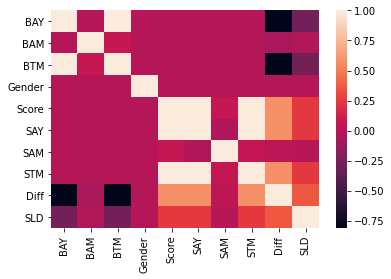

In [16]:
sns.heatmap(corr)

In [17]:
import sympy 

In [18]:
reduced_form, inds = sympy.Matrix(data.values).rref()
reduced_form

Matrix([
[1, 0, 12, 0, 0, 0, 0,  0, -12, 0],
[0, 1,  1, 0, 0, 0, 0,  0,  -1, 0],
[0, 0,  0, 1, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 1, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 1, 0, 12,  12, 0],
[0, 0,  0, 0, 0, 0, 1,  1,   1, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 1],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0, 0,  0,   0, 0],
[0, 0,  0, 0, 0, 0,

In [19]:
inds

(0, 1, 3, 4, 5, 6, 9)

In [20]:
inds = list(inds)
inds

[0, 1, 3, 4, 5, 6, 9]

In [21]:
for i in range(10):
    if(i not in inds):
        print(data.columns[i])

BTM
STM
Diff


In [ ]:
data = data.drop(['BAY','BAM','STM','Diff'], axis = 1) 

In [22]:
data.head(20)

,BAY,BAM,BTM,Gender,Score,SAY,SAM,STM,Diff,SLD
0,5,0,60,0,0,5,0,60,0,2
1,5,0,60,0,1,5,1,61,1,0
2,5,0,60,0,2,5,2,62,2,0
3,5,0,60,0,3,5,3,63,3,0
4,5,0,60,0,4,5,4,64,4,0
5,5,0,60,0,5,5,5,65,5,0
6,5,0,60,0,6,5,6,66,6,4
7,5,0,60,0,7,5,7,67,7,4
8,5,0,60,0,8,5,8,68,8,4
9,5,0,60,0,9,5,9,69,9,4


In [ ]:
data.cov()

,BTM,Gender,Score,SAY,SAM,SLD
BTM,2.351986e+03,0.000000e+00,0.000000,-2.010081e-16,-1.038542e-16,-1.114522e+01
Gender,0.000000e+00,2.500074e-01,0.000000,-3.004652e-17,7.851879e-20,1.423807e-17
Score,0.000000e+00,0.000000e+00,850.025048,8.440843e+01,5.940769e+00,5.892441e+00
SAY,-2.010081e-16,-3.004652e-17,84.408428,8.465106e+00,-2.426304e-01,5.871008e-01
SAM,-1.038542e-16,7.851879e-20,5.940769,-2.426304e-01,8.367073e+00,2.143294e-02
SLD,-1.114522e+01,1.423807e-17,5.892441,5.871008e-01,2.143294e-02,6.786918e-01


In [ ]:
data.cov()

,BTM,Gender,Score,SAY,SAM,SLD
BTM,2.351986e+03,0.000000e+00,0.000000,-2.010081e-16,-1.038542e-16,-1.114522e+01
Gender,0.000000e+00,2.500074e-01,0.000000,-3.004652e-17,7.851879e-20,1.423807e-17
Score,0.000000e+00,0.000000e+00,850.025048,8.440843e+01,5.940769e+00,5.892441e+00
SAY,-2.010081e-16,-3.004652e-17,84.408428,8.465106e+00,-2.426304e-01,5.871008e-01
SAM,-1.038542e-16,7.851879e-20,5.940769,-2.426304e-01,8.367073e+00,2.143294e-02
SLD,-1.114522e+01,1.423807e-17,5.892441,5.871008e-01,2.143294e-02,6.786918e-01


In [ ]:
data = data.drop(['Gender'], axis = 1) 

In [ ]:
data.head(20)

,BTM,Score,SAY,SAM,SLD
0,60,0,5,0,2
1,60,1,5,1,0
2,60,2,5,2,0
3,60,3,5,3,0
4,60,4,5,4,0
5,60,5,5,5,0
6,60,6,5,6,4
7,60,7,5,7,4
8,60,8,5,8,4
9,60,9,5,9,4


In [ ]:
corr = data.corr()

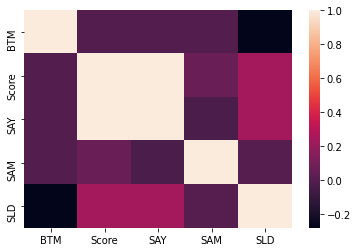

In [ ]:
sns.heatmap(corr)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [ ]:
data.head()

,BTM,Score,SAM,SLD
0,60,0,0,2
1,60,1,1,0
2,60,2,2,0
3,60,3,3,0
4,60,4,4,0


In [ ]:
data = data.drop(['SAM'], axis = 1) 

In [ ]:
data.shape

(33936, 3)

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(16968, 3)

In [ ]:
data.head()

,BTM,Score,SLD
0,60,0,2
1,60,1,0
2,60,2,0
3,60,3,0
4,60,4,0


In [ ]:
data=data.sample(frac=1).reset_index(drop=True)
data.head()

,BTM,Score,SLD
0,79,13,1
1,206,86,3
2,123,72,4
3,143,93,4
4,86,51,4


In [ ]:
X=data.drop(['SLD'],axis=1).values
y=data['SLD'].values
print(X.shape, y.shape)

(16968, 2) (16968,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(12726, 2) (12726,)
(4242, 2) (4242,)


In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y = to_categorical(y)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12726, 2) (12726, 5)
(4242, 2) (4242, 5)


In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
input_dim = X.shape[1]
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=input_dim))
model.add(Dense(25, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_68 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_69 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_70 (Dense)             (None, 75)                3825      
_________________________________________________________________
dense_71 (Dense)             (None, 100)               7600      
_________________________________________________________________
dense_72 (Dense)             (None, 5)                 505       
Total params: 13,535
Trainable params: 13,535
Non-trainable params: 0
_________________________________________________

In [ ]:
history = model.fit(X, y,
                    epochs=100,
                    verbose=True)

Epoch 1/100
531/531 [==============================] - 1s 2ms/step - loss: 0.3837 - accuracy: 0.8779
Epoch 2/100
531/531 [==============================] - 1s 2ms/step - loss: 0.2334 - accuracy: 0.9213
Epoch 3/100
531/531 [==============================] - 1s 2ms/step - loss: 0.1505 - accuracy: 0.9418
Epoch 4/100
531/531 [==============================] - 1s 2ms/step - loss: 0.1249 - accuracy: 0.9502
Epoch 5/100
531/531 [==============================] - 1s 2ms/step - loss: 0.1193 - accuracy: 0.9536
Epoch 6/100
531/531 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9648
Epoch 7/100
531/531 [==============================] - 1s 2ms/step - loss: 0.0907 - accuracy: 0.9635
Epoch 8/100
531/531 [==============================] - 1s 2ms/step - loss: 0.0883 - accuracy: 0.9636
Epoch 9/100
531/531 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9725
Epoch 10/100
531/531 [==============================] - 1s 2ms/step - loss: 0.0766 - accura

In [ ]:
loss, accuracy = model.evaluate(X, y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9872


In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    #val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    #val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Acc')
    #plt.plot(x, val_acc, 'r', label='Validation Acc')
    plt.title('Training Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    #plt.plot(x, val_loss, 'r', label='Validation Loss')
    plt.title('Training Loss')
    plt.legend()

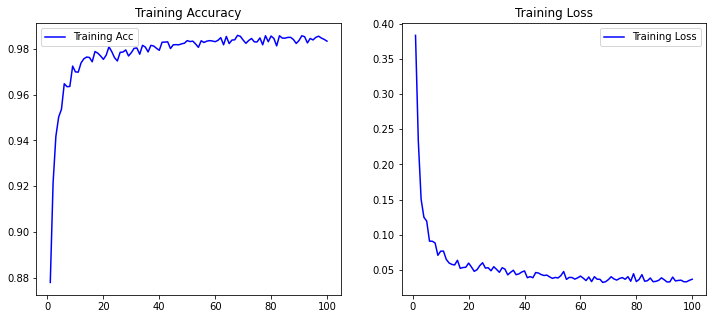

In [ ]:
plot_history(history)

In [ ]:
pred = model.predict([[60,31]])
classes = pred[0]
print(classes)
print(len(classes))
final=np.where(classes==max(classes))

[6.220243e-14 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00]
5


In [ ]:
print(final)

(array([4]),)


In [ ]:
if(final[0]==0):
    print("Good")
elif(final[0]==1):
    print("Mild")
elif(final[0]==2):
    print("Neutral")
elif(final[0]==3):
    print("Severe")
elif(final[0]==4):
    print("Well")    

Well


In [56]:
from keras.models import model_from_json

In [ ]:
model_json = model.to_json()

In [ ]:
with open("schonell.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights("schonell.h5")

In [ ]:
json_file = open('schonell.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("schonell.h5")

In [ ]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
loaded_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_68 (Dense)             (None, 25)                275       
_________________________________________________________________
dense_69 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_70 (Dense)             (None, 75)                3825      
_________________________________________________________________
dense_71 (Dense)             (None, 100)               7600      
_________________________________________________________________
dense_72 (Dense)             (None, 5)                 505       
Total params: 13,535
Trainable params: 13,535
Non-trainable params: 0
_________________________________________________

In [ ]:
y.shape

(16968, 5)

In [ ]:
loss, accuracy = loaded_model.evaluate(X, y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.9872


In [ ]:
import datetime
currentDate = datetime.datetime.now()
deadlineDate= datetime.datetime.strptime(deadline,'%d-%m-%Y')

daysLeft = deadlineDate - currentDate

years = ((daysLeft.total_seconds())/(365.242*24*3600))
yearsInt=int(years)

months=(years-yearsInt)*12
monthsInt=int(months)


years = ((daysLeft.total_seconds())/(365.242*24*3600))
yearsInt=int(years)

months=(years-yearsInt)*12
monthsInt=int(months)

BTM = (yearsInt*12)+monthsInt
BTM = abs(BTM)

def

KeyboardInterrupt: ignored

In [23]:
set = data.drop(['BAY',	'BAM'	,'BTM'	,'Gender','SAY',	'SAM','Diff',	'SLD'], axis=1)

In [24]:
set.head()

,Score,STM
0,0,60
1,1,61
2,2,62
3,3,63
4,4,64


In [25]:
set = set.drop_duplicates()

In [26]:
set.shape

(101, 2)

In [33]:
input_dim = 1
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=input_dim))
model.add(Dense(25, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(75, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 25)                275       
_________________________________________________________________
dense_8 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_9 (Dense)              (None, 75)                3825      
_________________________________________________________________
dense_10 (Dense)             (None, 100)               7600      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
__________________________________________________

In [46]:
history = model.fit(set['Score'], set['STM'],
                    epochs=500,
                    verbose=True)

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 0.9220
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 0.3527
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7061
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 0.9008
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 0.3156
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7148
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 0.4054
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 0.4393
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 0.4045
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 0.6690
Epoch 11/500
4/4 [==============================] - 0s 4ms/step - loss: 0.4588
Epoch 12/500
4/4 [==============================] - 0s 2ms/step - loss: 0.3721
Epoch 13/500
4/4 [==============================] - 0s 3ms/st

In [49]:
pred = model.predict([[1]])

In [50]:
pred

array([[61.0462]], dtype=float32)

In [55]:
ans = pred[0][0]
ans = int(round(ans))
ans

61

In [57]:
model_json = model.to_json()
with open("schonell1.json", "w") as json_file:
    json_file.write(model_json)


In [58]:
model.save_weights("schonell1.h5")

In [59]:
json_file = open('schonell1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("schonell1.h5")

In [60]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 25)                275       
_________________________________________________________________
dense_8 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_9 (Dense)              (None, 75)                3825      
_________________________________________________________________
dense_10 (Dense)             (None, 100)               7600      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
__________________________________________________

In [61]:
loaded_model.predict([[1]])

array([[61.0462]], dtype=float32)